#Title of the Project

In [1]:
print('Cancer Prediction Model')


Cancer Prediction Model


#Objective:
 To build a model for predicting cancer. (Binary Classification)


#Data Source:
The Breast Cancer Wisconsin (Diagnostic) dataset available in scikit-learn.

#Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#Import Data

In [2]:
data = load_breast_cancer()
X = data.data
y = data.target

#Describe data

In [3]:
print('Feature Names:')
print(data.feature_names)
print('\nTarget Names:')
print(data.target_names)

Feature Names:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']

Target Names:
['malignant' 'benign']


#Data Visualization


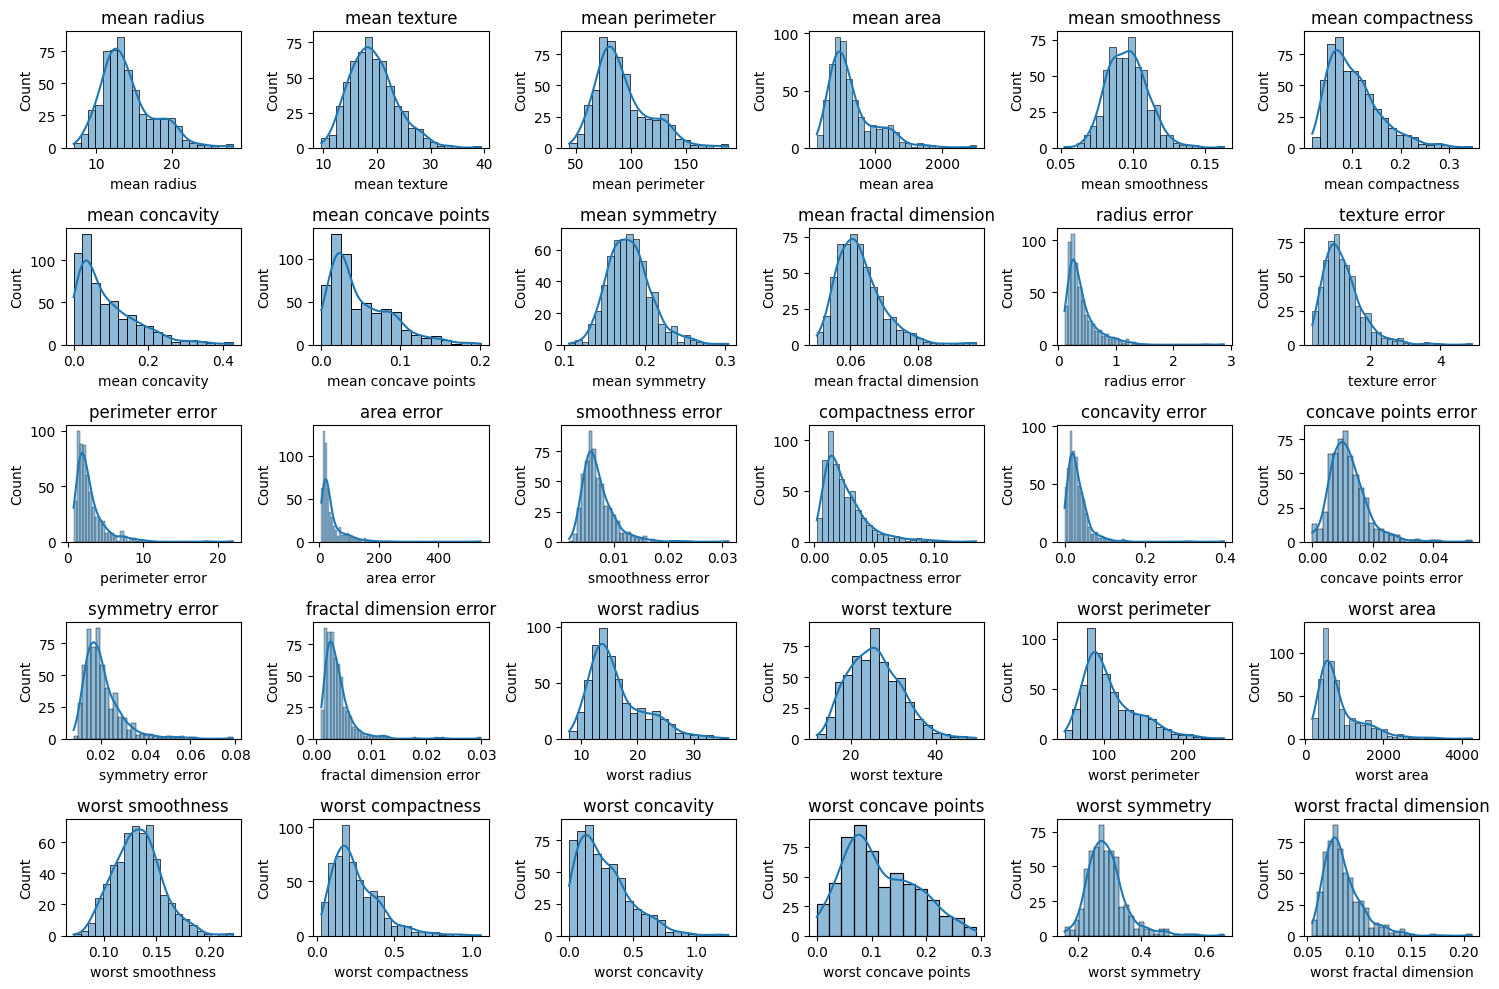

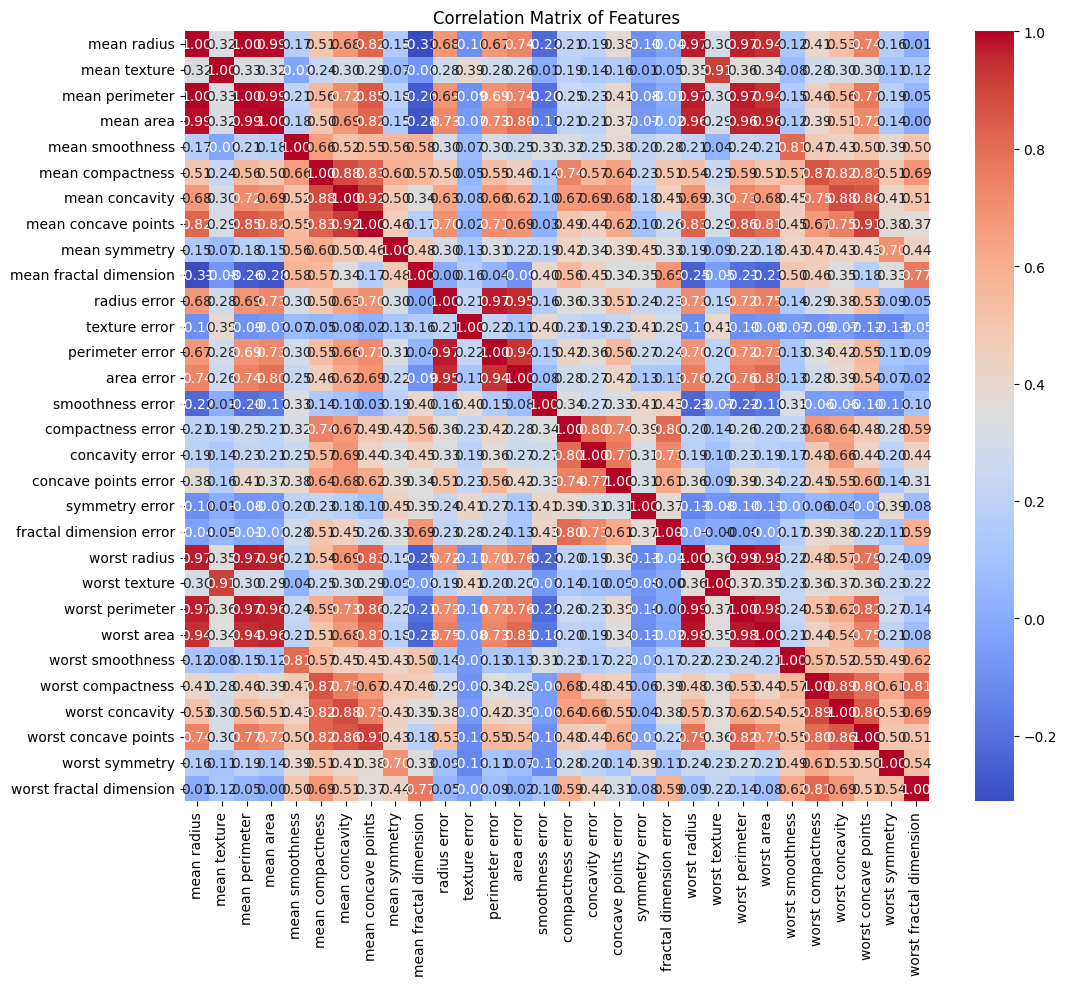

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
df_features = pd.DataFrame(X, columns=data.feature_names)
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df_features.columns, 1):
  plt.subplot(5, 6, i)
  sns.histplot(df_features[feature], kde=True)
  plt.title(feature)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 10))
sns.heatmap(df_features.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

#Data Preprocessing

In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Define Target Variable(y) and feature variable (x)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
print("Training set shape - Features:", X_train.shape, "Target:", y_train.shape)
print("Testing set shape - Features:", X_test.shape, "Target:", y_test.shape)

Training set shape - Features: (455, 30) Target: (455,)
Testing set shape - Features: (114, 30) Target: (114,)


#Modelling (Logistic Regression)

In [8]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

#Model Evaluation

In [9]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [10]:
print("Accuracy:", accuracy)
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.9736842105263158

Confusion Matrix:
[[41  2]
 [ 1 70]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



#Prediction


In [11]:
y_pred = model.predict(X_test)

In [12]:
print("Predicted values:", y_pred)

Predicted values: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 0 0]


In [13]:
print("Actual values:", y_test)

Actual values: [1 0 0 1 1 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0
 1 0 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 0 0 1 0
 1 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 0 1 1 1 0 1 1 0
 1 1 0]


#Explanation
The logistic regression model is trained using standardized feature variables to predict the presence of cancer (binary classification).
Standardization helps to ensure that each feature contributes equally to the prediction.